In [1]:
%reload_ext autoreload
%autoreload 2

import data
import t5
import eval

OUTPUT_DIR = "output"
cutoff = None
k = 16

2023-01-31 04:22:23.056902: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-31 04:22:23.576024: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.8/dist-packages/torch/lib:/usr/local/lib/python3.8/dist-packages/torch_tensorrt/lib:/usr/local/cuda/compat/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-01-31 04:22:23.576071: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object 

In [2]:
g8 = data.load_gsm8k(cutoff=cutoff)
m, tk = t5.load_model("google/flan-t5-xxl")

Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

In [3]:
raw, processed = eval.t5_eval_loop(g8, m, tk, k=k)

  0%|          | 0/1319 [00:00<?, ?it/s]

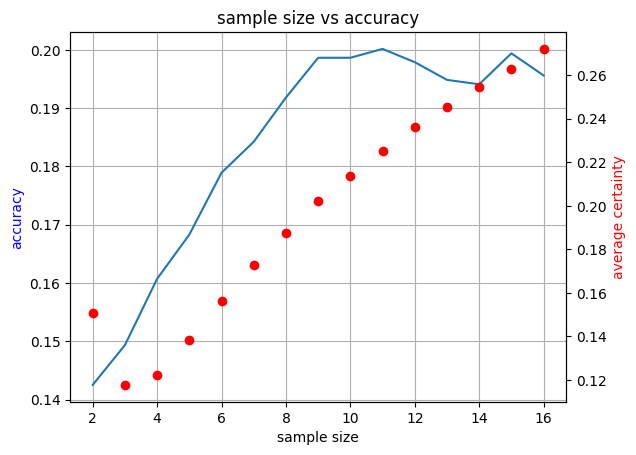

In [4]:
eval.plot_sample_vs_accuracy(processed)


In [5]:
raw_path = f"{OUTPUT_DIR}/raw-flan-t5-gsm8k-cutoff{cutoff}-k{k}.json"
eval.save_eval_result(raw, raw_path)

processed_path = f"{OUTPUT_DIR}/processed-flan-t5-gsm8k-cutoff{cutoff}-k{k}.json"
eval.save_eval_result(processed, processed_path)